Synkrisis: The Bigraph Model Checker
===========================
* * *

A quick introduction
---------------------------------

Synkrisis is a bigraph modelling and engineering toolchain sporting a modular approach based on Bigmc model checker.  
It features static analysis for bigraph specification and supports its own transition system and model exporting for DTMC/MDP/LTS analysis.  
Output transition graphs can be exported to PRISM and SPOT model checkers.  
Note that you may download this notebook or directly pull Synkrisis and bigmc to run it locally.  


## Resources
More info on:        
* Bigraphs:  https://www.itu.dk/research/pls/wiki/index.php/A_Brief_Introduction_To_Bigraphs  
* Bigmc:     https://github.com/bigmc/bigmc  
* Prism model checker: https://www.prismmodelchecker.org/    
* Spot model checker:  https://spot.lrde.epita.fr/  
* and its HOA format:  https://spot.lrde.epita.fr/concepts.html#hoa  


## Synkrisis Syntax
You can import your bigraph model from file using Synkrisis syntax.
(https://github.com/AlessandroCaste/Synkrisis/wiki/Synkrisis-Syntax) 

This is a general layout of a bigraph model specification:  
`controls`  
`names`  
`rules`  
`model specification`  
`makers`  
`spot-acceptance`  
`prism properties`  

You can write your .bigraph specification in this notebook or directly from Synkrisis Shell.
To launch Synkrisis just runn Synkrisis_Engine! :)

Here you can find further sample models: https://github.com/AlessandroCaste/Synkrisis/tree/master/src/test/java/models 
* * *
Specify your model
----------------

Input your bigraph model here:


In [1]:
%%writefile addition.bigraph

# Model Specification

controls:
    active IN 0 # for Increase or add
    active L  0
    active R  0
    active Succ 0
    active Zero 0

rule r1 = IN.(L.$1|R.Zero)->$1
rule r2 = IN.(L.$1|R.Succ.$2)->IN.(L.Succ.$1|R.$2)


model addition = IN.(L.Succ.Succ.Zero|R.Succ.Succ.Zero)|IN.(L.Succ.Zero|R.Succ.Succ.Zero)

# properties
marker workable = !terminal()

Writing addition.bigraph


In [5]:
# Set here the running arguments of your Synkrisis Execution

# Path to the file to be executed
filename = "examples/addition.bigraph"

# The name of the model inside the file (ex: addition)
modelname = "addition"

# Maximum number of execution steps (unlimited is 0)
steps = 0

# Print model and transition file?
printable = True

# Write some .dot file every x steps (default : 0)
frequency = 0

# Translate to the following languages?
prism = False
spot = False

In [3]:
import subprocess

execution = "java -jar Synkrisis.jar -l" + filename
if steps > 0:
    execution += " -m " + steps
if printable: 
    execution += " -G "
if frequency > 0:
    execution += " -r " + frequency
if spot:
    execution += " -o spot "
if prism:
    execution += " -o prism "

result = subprocess.run(execution, stdout=subprocess.PIPE, shell=True, universal_newlines=True)
print(result.stdout)

Visualize your model
---------------------------------

Visualize model and reactions bigraphs

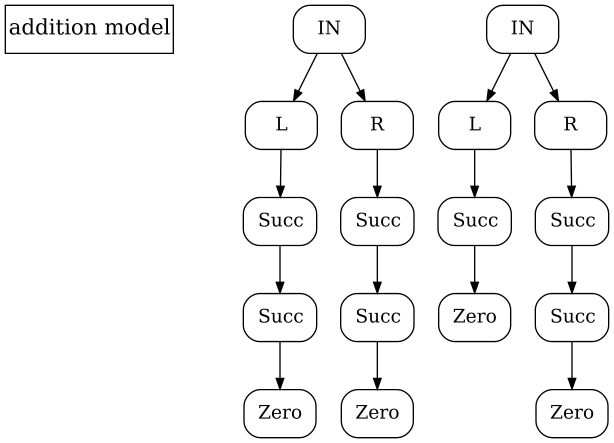

In [29]:
from IPython.display import Image
Image(modelname + "/" + modelname + ".png") 

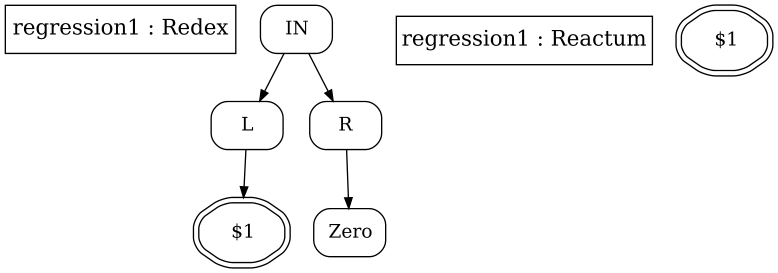

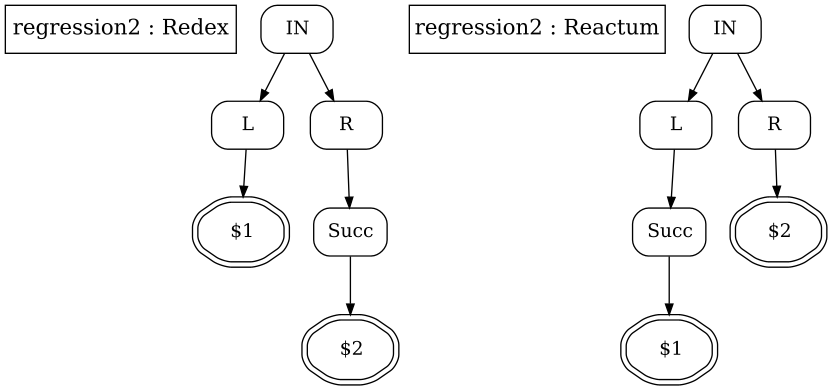

In [68]:
from IPython.display import Image
from os import listdir
rulepath = modelname+"/rules/"
for f in reversed(listdir(rulepath)):
    display(Image (modelname+"/rules/"+f))

## Transition Visualization  
  
Note that transition graphs too big may or with long rules names may be impossible to write or read 


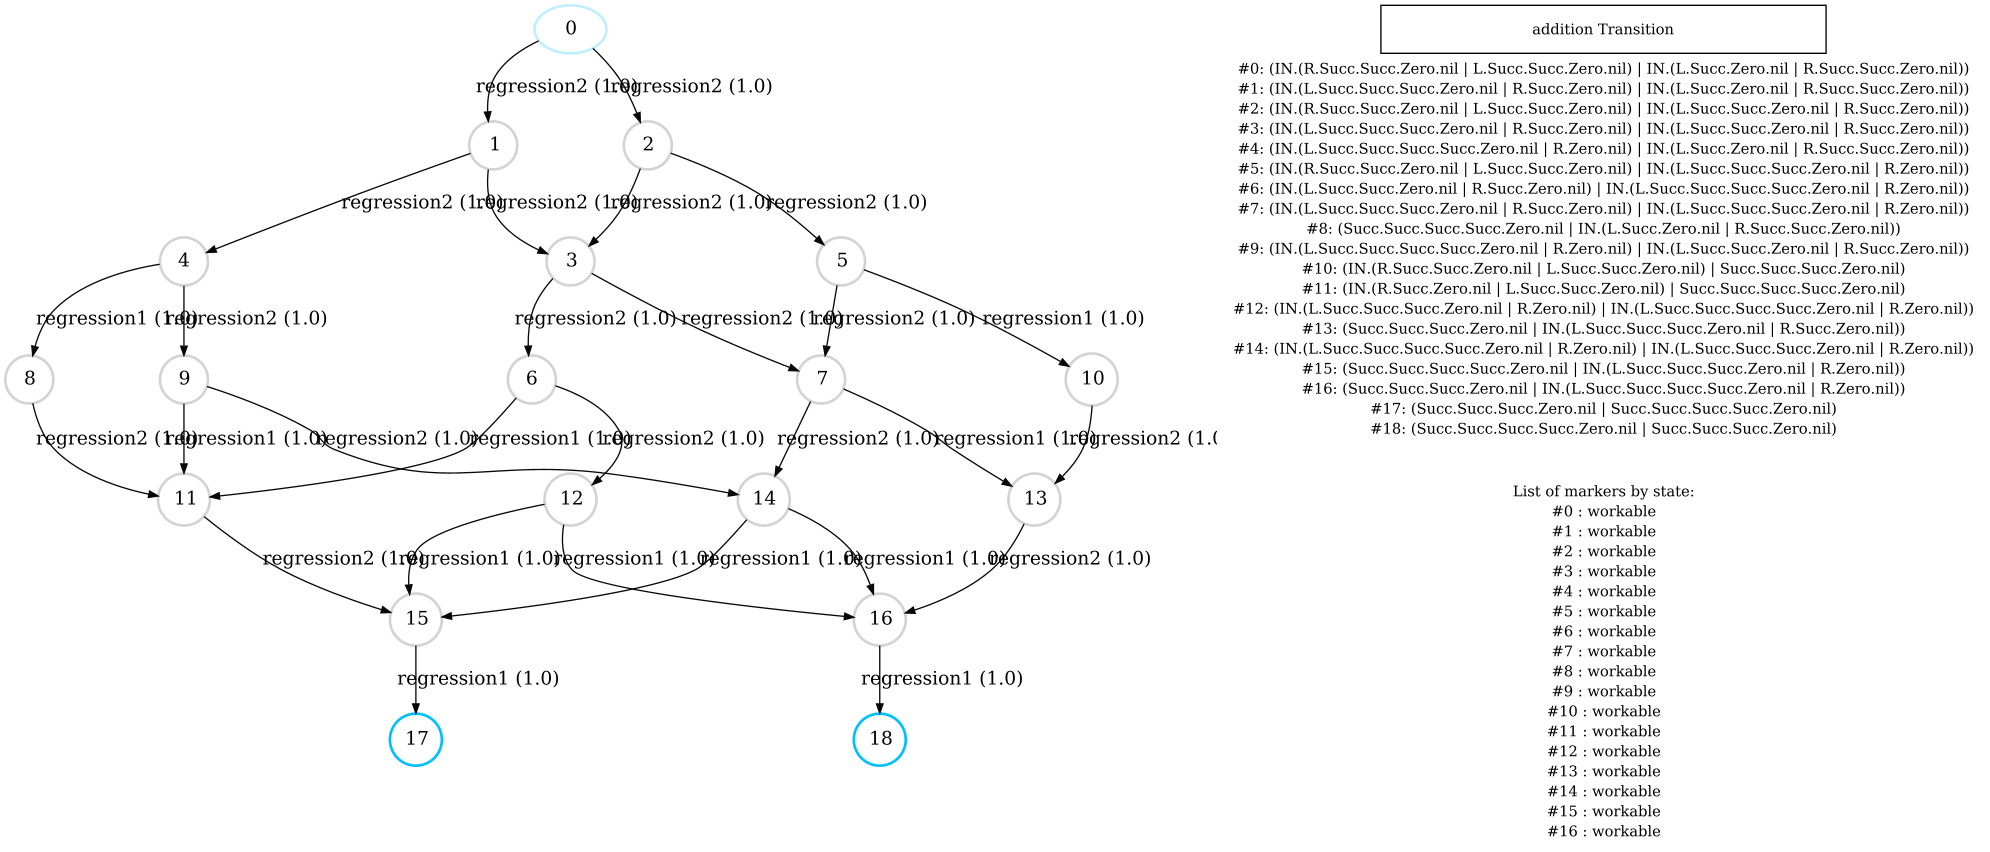

In [4]:
from IPython.display import Image
Image(modelname+"/transition.png") 